In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import argrelextrema
from matplotlib import gridspec

In [2]:
mm1 = pd.read_csv('../data/First Run.csv')
mm2 = pd.read_csv('../data/Second Run.csv')
mm3 = pd.read_csv('../data/Third Run.csv')

TypeError: unhashable type: 'slice'

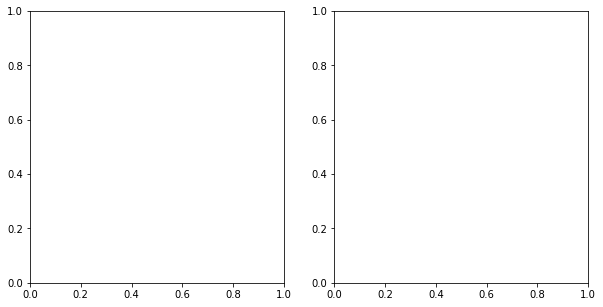

In [3]:
figure, subplots = plt.subplots(nrows = 1, ncols = 2,figsize=(10, 5))
plot1, plot2 = subplots
plot1.plot(mm1[3,:],mm1[2,:],'r.',label = "2 mm slit")
plot1.plot(mm2[3,:],mm2[2,:],'b.',label = "4 mm slit")
plot1.plot(mm3[3,:],mm3[2,:],'y.', label = "8 mm slit")
plot1.set_xlabel("Voltage(V)")
plot1.set_ylabel("Current(pA)")
plot1.legend()
plot2.plot(mm1[3,15:],mm1[2,15:],'r.',label = "2 mm slit")
plot2.plot(mm2[3,15:],mm4[2,15:],'b.',label = "4 mm slit")
plot2.plot(mm8[3,15:],mm8[2,15:],'y.', label = "8 mm slit")
plot2.set_xlabel("Voltage(V)")
plot2.set_ylabel("Current(pA)")
plot2.legend()
plt.show()

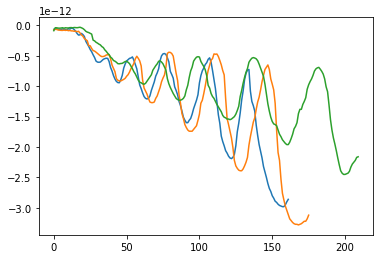

In [4]:
mm1['Current (A)'].plot();
mm2['Current (A)'].plot();
mm3['Current (A)'].plot();

In [5]:
run1 = mm1.values
run2 = mm2.values
run3 = mm3.values
np.shape(run1)

(162, 4)

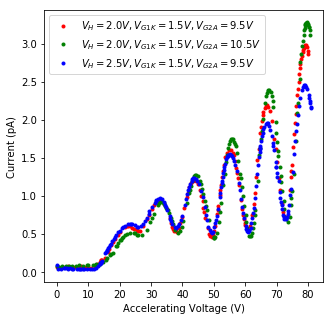

In [6]:
plt.figure(figsize=(5,5))
plt.plot(run1[:,2],-run1[:,1]*10**12,'r.',label = "$V_H=2.0V, V_{G1K}= 1.5V, V_{G2A}= 9.5V$")
plt.plot(run2[:,2],-run2[:,1]*10**12,'g.',label = "$V_H=2.0V, V_{G1K}= 1.5V, V_{G2A}= 10.5V$")
plt.plot(run3[:,2],-run3[:,1]*10**12,'b.',label = "$V_H=2.5V, V_{G1K}= 1.5V, V_{G2A}= 9.5V$")
bot,top = plt.ylim()
plt.legend()
plt.xlabel("Accelerating Voltage (V)")
plt.ylabel("Current (pA)")
plt.show()


In [ ]:
def func(x, A,h, k):
    return  A*(x-h)**2 + k

In [ ]:
for i in range(0,5)
    

In [ ]:
xdata = run1[:,2]
ydata = -run1[:,1]

In [ ]:
i = 0
plt.plot(xdata[i:],ydata[i:],'r.',label = "Run 1")
plt.show()

In [ ]:
Peaks1 = [45, 65, 93,122]
Lows1 = [37,55,77,107,135]
Region = np.append(Peaks1,Lows1)
extrema = np.zeros(shape=(9,2))
err = np.zeros(shape=(9,2))
res = np.zeros(shape=(9,14))
resrange = np.zeros(shape=(9,14))

for i in range(0,9,1):
    xrange = xdata[Region[i]-7:Region[i]+7]
    yrange = ydata[Region[i]-7:Region[i]+7]
    popt, pcov = curve_fit(func, xrange, yrange)
    perr = np.sqrt(np.diag(pcov))
    
    extrema[i,:] = [popt[1],popt[2]]
    err[i,:] = [perr[1],perr[2]]
    res[i,:] = yrange - func(xrange, *popt)
    resrange[i,:] = xrange
    
    plt.plot(xdata,ydata)
    plt.plot(xdata, func(xdata, *popt))
    
plt.show()

In [ ]:
extrema

In [ ]:
dist = []
disterr = []
for i in range(0,8,1):
    a = extrema[i+1,0]-extrema[i,0]
    if a<0:
        pass
    else:
        dist=np.append(a,dist)
        b = np.sqrt(err[i,0]**2+err[i,0]**2)
        disterr = np.append(b,disterr)
    
dist

In [ ]:

inverr = [x**-2 for x in disterr]
suminv = sum(inverr)
Verr1 = np.sqrt(1 / suminv)
weisum = [x*y for [x,y] in zip(inverr,dist) ]
Vavg1 = sum(weisum)/suminv
Verr

In [ ]:
for i  in range(0,9,1):
    #plt.scatter(resrange[i,:],res[i,:])
    yerr = err[i,1]
    xerr = err[i,0]
    
    bot = np.amin(res)
    top = np.amax(res)
    plt.errorbar(resrange[i,:],res[i,:], yerr,xerr,fmt='o')
    plt.axhline(y=0)
    plt.ylim((bot, top))
    
plt.rcParams["figure.figsize"] = [15,15]  
plt.show()

In [ ]:
fig = plt.figure(1)
gridspec.GridSpec(4,4)

plt.subplot2grid((4,4), (0,0), colspan=4, rowspan=3)
plt.plot(xdata,ydata*10**12,'r.')
for i in range(0,9,1):
    xrange = xdata[Region[i]-7:Region[i]+7]
    yrange = ydata[Region[i]-7:Region[i]+7]
    popt, pcov = curve_fit(func, xrange, yrange)
    perr = np.sqrt(np.diag(pcov))
    
    extrema[i,:] = [popt[1],popt[2]]
    err[i,:] = [perr[1],perr[2]]
    res[i,:] = yrange - func(xrange, *popt)
    resrange[i,:] = xrange
    plt.plot(xrange, func(xrange, *popt)*10**12)
    bot1 = bot*10**12
    top1 = top*10**12
    plt.ylim((bot1, top1))

plt.xlabel("Accelerating Voltage (V)")
plt.ylabel("Current (pA)")

plt.subplot2grid((4,4), (3,0),colspan=4, rowspan=1)
for i  in range(0,9,1):
    yerr = err[i,1]
    xerr = err[i,0]
    bot2 = np.amin(res)*10**12
    top2 = np.amax(res)*10**12
    plt.errorbar(resrange[i,:],res[i,:]*10**12, yerr*10**12,xerr,fmt='o')
    plt.axhline(y=0)
    plt.ylim((bot2, top2))
    
#plot2.rcParams["figure.figsize"] = [5,15] 
plt.xlabel("Accelerating Voltage (V)")
plt.ylabel("Current (pA)")

fig.tight_layout()
fig.set_size_inches(w=8,h=12)
fig_name = 'First Run.png'
fig.savefig(fig_name)

In [ ]:
xdata = run2[:,2]
ydata = -run2[:,1]
i = 0
plt.plot(xdata[i:],ydata[i:],'r.')
bot,top = plt.ylim()
plt.show()


In [ ]:
Peaks1 = [48, 69, 95,129]
Lows1 = [59,81,115,147]
Region = np.append(Peaks1,Lows1)
extrema = np.zeros(shape=(8,2))
err = np.zeros(shape=(8,2))
res = np.zeros(shape=(8,14))
resrange = np.zeros(shape=(8,14))

for i in range(0,8,1):
    xrange = xdata[Region[i]-7:Region[i]+7]
    yrange = ydata[Region[i]-7:Region[i]+7]
    popt, pcov = curve_fit(func, xrange, yrange)
    perr = np.sqrt(np.diag(pcov))
    
    extrema[i,:] = [popt[1],popt[2]]
    err[i,:] = [perr[1],perr[2]]
    res[i,:] = yrange - func(xrange, *popt)
    resrange[i,:] = xrange
    
    plt.plot(xdata,ydata)
    plt.plot(xdata, func(xdata, *popt))
    plt.ylim((bot, top))

In [ ]:
dist = []
disterr = []
for i in range(0,7,1):
    a = extrema[i+1,0]-extrema[i,0]
    if a<0:
        pass
    else:
        dist=np.append(a,dist)
        b = np.sqrt(err[i,0]**2+err[i,0]**2)
        disterr = np.append(b,disterr)
    
dist

In [ ]:
inverr = [x**-2 for x in disterr]
suminv = sum(inverr)
Verr2 = np.sqrt(1 / suminv)
weisum = [x*y for [x,y] in zip(inverr,dist) ]
Vavg2 = sum(weisum)/suminv
Vavg

In [ ]:
for i  in range(0,8,1):
    #plt.scatter(resrange[i,:],res[i,:])
    yerr = err[i,1]
    xerr = err[i,0]
    
    bot = np.amin(res)
    top = np.amax(res)
    plt.errorbar(resrange[i,:],res[i,:], yerr,xerr,fmt='o')
    plt.axhline(y=0)
    plt.ylim((bot, top))
    
plt.rcParams["figure.figsize"] = [25,5]  
plt.show()

In [ ]:
fig = plt.figure(1)
gridspec.GridSpec(4,4)

plt.subplot2grid((4,4), (0,0), colspan=4, rowspan=3)
plt.plot(xdata,ydata*10**12,'r.')
for i in range(0,8,1):
    xrange = xdata[Region[i]-7:Region[i]+7]
    yrange = ydata[Region[i]-7:Region[i]+7]
    popt, pcov = curve_fit(func, xrange, yrange)
    perr = np.sqrt(np.diag(pcov))
    
    extrema[i,:] = [popt[1],popt[2]]
    err[i,:] = [perr[1],perr[2]]
    res[i,:] = yrange - func(xrange, *popt)
    resrange[i,:] = xrange
    plt.plot(xrange, func(xrange, *popt)*10**12)
    bot1 = bot*10**12
    top1 = top*10**12
    plt.ylim((bot1, top1))

plt.xlabel("Accelerating Voltage (V)")
plt.ylabel("Current (pA)")

plt.subplot2grid((4,4), (3,0),colspan=4, rowspan=1)
for i  in range(0,8,1):
    yerr = err[i,1]
    xerr = err[i,0]
    bot2 = np.amin(res)*10**12
    top2 = np.amax(res)*10**12
    plt.errorbar(resrange[i,:],res[i,:]*10**12, yerr*10**12,xerr,fmt='o')
    plt.axhline(y=0)
    plt.ylim((bot2, top2))
    
#plot2.rcParams["figure.figsize"] = [5,15] 
plt.xlabel("Accelerating Voltage (V)")
plt.ylabel("Current (pA)")

fig.tight_layout()
fig.set_size_inches(w=8,h=12)
fig_name = 'Second Run.png'
fig.savefig(fig_name)

In [ ]:
xdata = run3[:,2]
ydata = -run3[:,1]
i = 0
plt.plot(xdata[i:],ydata[i:],'r.')
bot,top = plt.ylim()
plt.show()

In [ ]:
Peaks1 = [63, 87, 121,160]
Lows1 = [74,100,139,182]
Region = np.append(Peaks1,Lows1)
extrema = np.zeros(shape=(8,2))
err = np.zeros(shape=(8,2))
res = np.zeros(shape=(8,14))
resrange = np.zeros(shape=(8,14))

for i in range(0,8,1):
    xrange = xdata[Region[i]-7:Region[i]+7]
    yrange = ydata[Region[i]-7:Region[i]+7]
    popt, pcov = curve_fit(func, xrange, yrange)
    perr = np.sqrt(np.diag(pcov))
    
    extrema[i,:] = [popt[1],popt[2]]
    err[i,:] = [perr[1],perr[2]]
    res[i,:] = yrange - func(xrange, *popt)
    resrange[i,:] = xrange
    
    plt.plot(xdata,ydata)
    plt.plot(xdata, func(xdata, *popt))
    plt.ylim((bot, top))
    
plt.show()

In [ ]:
for i  in range(0,8,1):
    #plt.scatter(resrange[i,:],res[i,:])
    yerr = err[i,1]
    xerr = err[i,0]
    
    bot = np.amin(res)
    top = np.amax(res)
    plt.errorbar(resrange[i,:],res[i,:], yerr,xerr,fmt='o')
    plt.axhline(y=0)
    plt.ylim((bot, top))
    
plt.rcParams["figure.figsize"] = [25,5]  
plt.show()

In [ ]:
fig = plt.figure(1)
gridspec.GridSpec(4,4)

plt.subplot2grid((4,4), (0,0), colspan=4, rowspan=3)
plt.plot(xdata,ydata*10**12,'r.')
for i in range(0,8,1):
    xrange = xdata[Region[i]-7:Region[i]+7]
    yrange = ydata[Region[i]-7:Region[i]+7]
    popt, pcov = curve_fit(func, xrange, yrange)
    perr = np.sqrt(np.diag(pcov))
    
    extrema[i,:] = [popt[1],popt[2]]
    err[i,:] = [perr[1],perr[2]]
    res[i,:] = yrange - func(xrange, *popt)
    resrange[i,:] = xrange
    plt.plot(xrange, func(xrange, *popt)*10**12)
    bot1 = bot*10**12
    top1 = top*10**12

plt.xlabel("Accelerating Voltage (V)")
plt.ylabel("Current (pA)")

plt.subplot2grid((4,4), (3,0),colspan=4, rowspan=1)
for i  in range(0,8,1):
    yerr = err[i,1]
    xerr = err[i,0]
    bot2 = np.amin(res)*10**12
    top2 = np.amax(res)*10**12
    plt.errorbar(resrange[i,:],res[i,:]*10**12, yerr*10**12,xerr,fmt='o')
    plt.axhline(y=0)
    plt.ylim((bot2, top2))
    
#plot2.rcParams["figure.figsize"] = [5,15] 
plt.xlabel("Accelerating Voltage (V)")
plt.ylabel("Current (pA)")

fig.tight_layout()
fig.set_size_inches(w=8,h=12)
fig_name = 'Second Run.png'
fig.savefig(fig_name)

In [ ]:
dist = []
disterr = []
for i in range(0,7,1):
    a = extrema[i+1,0]-extrema[i,0]
    if a<0:
        pass
    else:
        dist=np.append(a,dist)
        b = np.sqrt(err[i,0]**2+err[i,0]**2)
        disterr = np.append(b,disterr)
    
dist

In [ ]:
inverr = [x**-2 for x in disterr]
suminv = sum(inverr)
Verr3 = np.sqrt(1 / suminv)
weisum = [x*y for [x,y] in zip(inverr,dist) ]
Vavg3 = sum(weisum)/suminv
Verr

In [ ]:
Eavg = (Vavg1+Vavg2+Vavg3)/3

In [ ]:
A = Verr1**-2+Verr2**-2+Verr3**-2
Eerr = np.sqrt(1/A)

In [ ]:
Eerr